Number of nodes (countries): 324
Number of edges (student flows): 1034


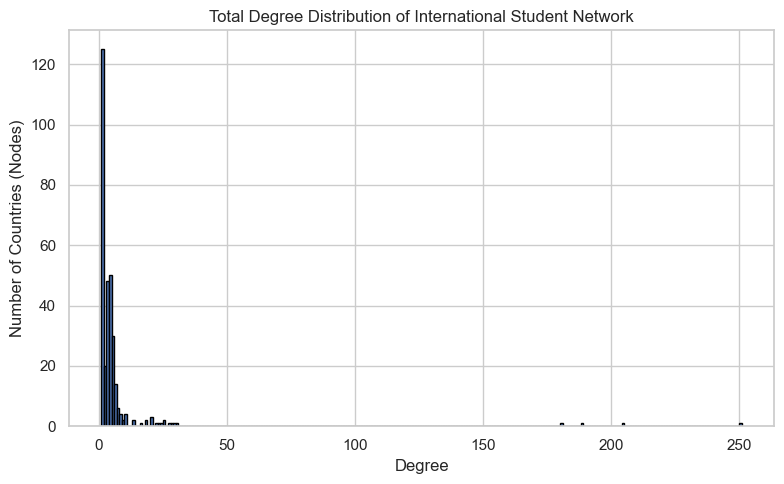

In [9]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load and clean dataset
df = pd.read_csv("NCS_IS.csv")
df.columns = df.columns.str.strip()  # Strip trailing spaces from headers

# Keep only relevant columns
df = df[['From', 'To', 'Number of Students']]

# Drop rows with missing data
df = df.dropna(subset=['From', 'To', 'Number of Students'])

# Remove rows where 'Number of Students' is not numeric
df = df[df['Number of Students'].astype(str).str.replace(",", "").str.strip().str.isnumeric()]

# Convert 'Number of Students' to integer
df['Number of Students'] = df['Number of Students'].astype(str).str.replace(",", "").astype(int)

# Build directed graph
G = nx.DiGraph()
for _, row in df.iterrows():
    G.add_edge(row['From'], row['To'], weight=row['Number of Students'])

# Number of nodes and edges
N = G.number_of_nodes()
E = G.number_of_edges()

print(f"Number of nodes (countries): {N}")
print(f"Number of edges (student flows): {E}")

# Plot total degree distribution
total_degrees = [deg for _, deg in G.degree()]
plt.figure(figsize=(8, 5))
plt.hist(total_degrees, bins=range(1, max(total_degrees) + 2), edgecolor='black')
plt.title("Total Degree Distribution of International Student Network")
plt.xlabel("Degree")
plt.ylabel("Number of Countries (Nodes)")
plt.grid(True)
plt.tight_layout()
plt.show()


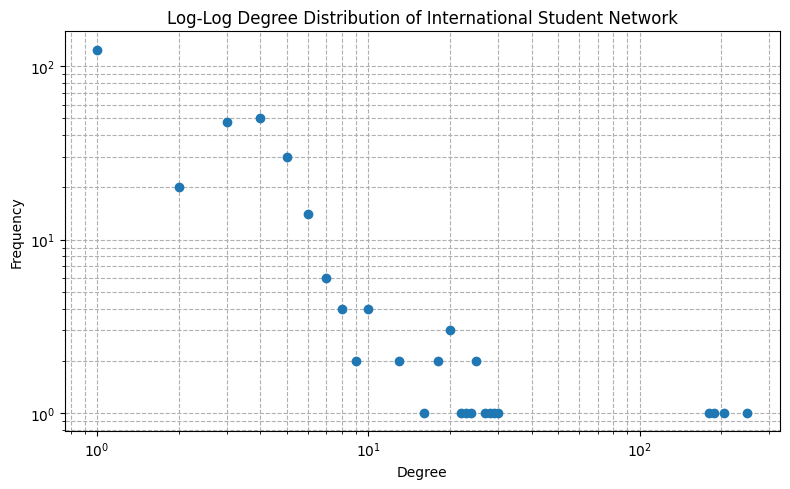

In [3]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Load and clean dataset
df = pd.read_csv("NCS_IS.csv")
df.columns = df.columns.str.strip()

# Keep only relevant columns
df = df[['From', 'To', 'Number of Students']]

# Drop missing values and clean 'Number of Students'
df = df.dropna(subset=['From', 'To', 'Number of Students'])
df = df[df['Number of Students'].astype(str).str.replace(",", "").str.strip().str.isnumeric()]
df['Number of Students'] = df['Number of Students'].astype(str).str.replace(",", "").astype(int)

# Build directed graph
G = nx.DiGraph()
for _, row in df.iterrows():
    G.add_edge(row['From'], row['To'], weight=row['Number of Students'])

# Degree distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = {}
for degree in degree_sequence:
    degree_count[degree] = degree_count.get(degree, 0) + 1

# Prepare data for log-log plot
degrees = np.array(list(degree_count.keys()))
counts = np.array(list(degree_count.values()))

# Plot log-log degree distribution
plt.figure(figsize=(8, 5))
plt.loglog(degrees, counts, marker='o', linestyle='none')
plt.title("Log-Log Degree Distribution of International Student Network")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()


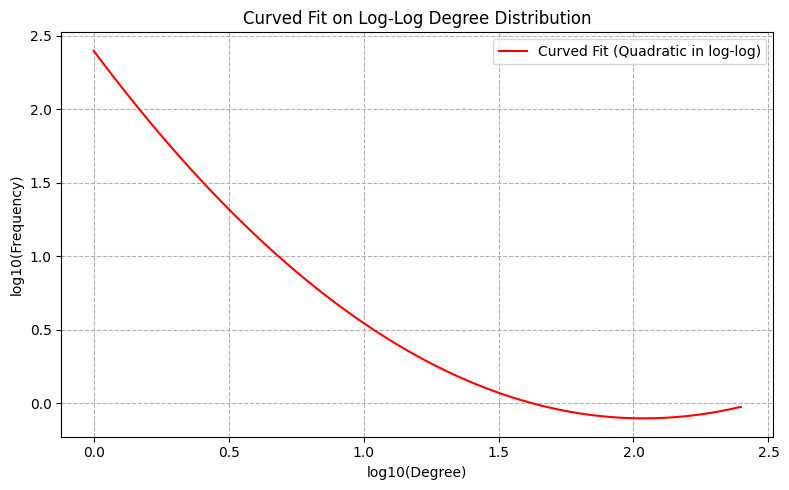

Estimated gamma: 0.8799


In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import polyfit

# Load and clean dataset
df = pd.read_csv("NCS_IS.csv")
df.columns = df.columns.str.strip()

df = df[['From', 'To', 'Number of Students']]
df = df.dropna(subset=['From', 'To', 'Number of Students'])
df = df[df['Number of Students'].astype(str).str.replace(",", "").str.strip().str.isnumeric()]
df['Number of Students'] = df['Number of Students'].astype(str).str.replace(",", "").astype(int)

# Build directed graph
G = nx.DiGraph()
for _, row in df.iterrows():
    G.add_edge(row['From'], row['To'], weight=row['Number of Students'])

# Degree distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = {}
for degree in degree_sequence:
    degree_count[degree] = degree_count.get(degree, 0) + 1

degrees = np.array(list(degree_count.keys()))
counts = np.array(list(degree_count.values()))

# Filter out zeros to avoid log(0)
degrees = degrees[degrees > 0]
counts = counts[degrees > 0]

# Take log
log_degrees = np.log10(degrees)
log_counts = np.log10(counts)

# Fit a 2nd-degree polynomial (curved fit)
b, m1, m2 = polyfit(log_degrees, log_counts, 2)

# Generate smooth fitted curve
log_degrees_fit = np.linspace(min(log_degrees), max(log_degrees), 100)
log_counts_fit = b + m1 * log_degrees_fit + m2 * log_degrees_fit**2

# Plot
plt.figure(figsize=(8, 5))
plt.plot(log_degrees_fit, log_counts_fit, 'r-', label='Curved Fit (Quadratic in log-log)')
plt.title("Curved Fit on Log-Log Degree Distribution")
plt.xlabel("log10(Degree)")
plt.ylabel("log10(Frequency)")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()
# Linear fit in log-log space to estimate gamma
m, c = np.polyfit(log_degrees, log_counts, 1)
gamma = -m
print(f"Estimated gamma: {gamma:.4f}")

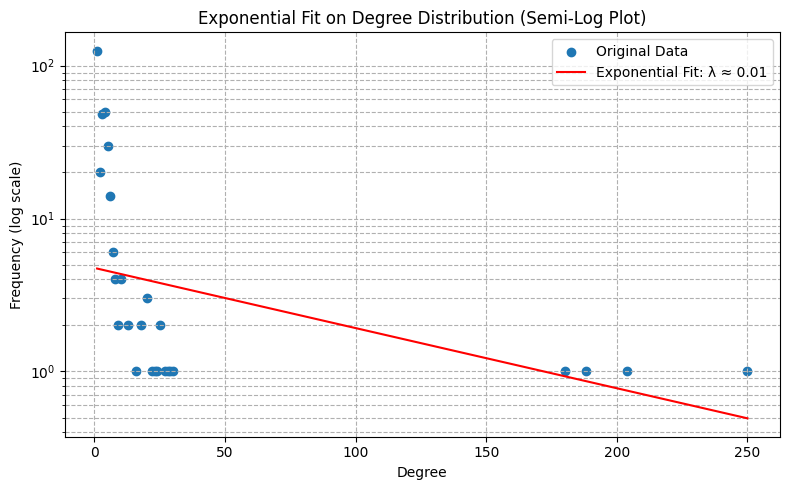

In [4]:
# Degree distribution (same as before)
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = {}
for degree in degree_sequence:
    degree_count[degree] = degree_count.get(degree, 0) + 1

degrees = np.array(list(degree_count.keys()))
counts = np.array(list(degree_count.values()))

# Filter out zeros
mask = (degrees > 0) & (counts > 0)
degrees = degrees[mask]
counts = counts[mask]

# Take log only of the counts (semi-log)
log_counts = np.log(counts)

# Fit exponential model: log(count) = a - b * degree
b, a = np.polyfit(degrees, log_counts, 1)

# Compute fitted values
degrees_fit = np.linspace(min(degrees), max(degrees), 100)
log_counts_fit = a + b * degrees_fit
counts_fit = np.exp(log_counts_fit)
plt.figure(figsize=(8, 5))
plt.scatter(degrees, counts, label='Original Data')
plt.plot(degrees_fit, counts_fit, color='red', label=f'Exponential Fit: λ ≈ {-b:.2f}')
plt.yscale("log")  # Semi-log plot
plt.title("Exponential Fit on Degree Distribution (Semi-Log Plot)")
plt.xlabel("Degree")
plt.ylabel("Frequency (log scale)")
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()
plt.show()



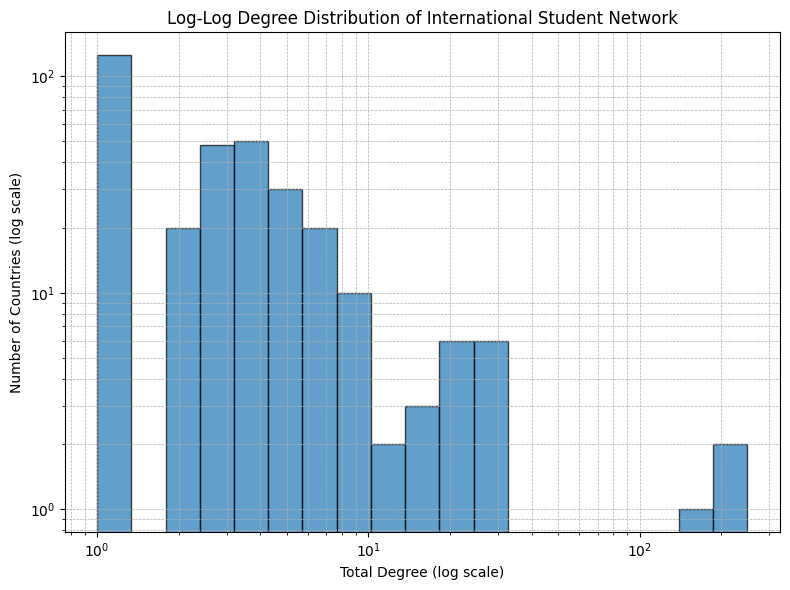

In [4]:
import numpy as np

# Calculate total degree for each node
total_degrees = [deg for _, deg in G.degree()]

# Define logarithmic bins
min_degree = min(total_degrees)
max_degree = max(total_degrees)
bins = np.logspace(np.log10(min_degree), np.log10(max_degree), num=20)

# Plot degree distribution with log-log scale
plt.figure(figsize=(8, 6))
plt.hist(total_degrees, bins=bins, edgecolor='black', alpha=0.7)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Total Degree (log scale)")
plt.ylabel("Number of Countries (log scale)")
plt.title("Log-Log Degree Distribution of International Student Network")
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.show()


In [12]:
# Load and clean the dataset
df = pd.read_csv("NCS_IS.csv")
df.columns = df.columns.str.strip()
df = df[['From', 'To', 'Number of Students']].dropna()
df['Number of Students'] = df['Number of Students'].astype(str).str.replace(",", "").astype(int)

# Create directed graph
G = nx.DiGraph()
for _, row in df.iterrows():
    G.add_edge(row['From'], row['To'], weight=row['Number of Students'])

# 1. Eigenvector Centrality
# Extract largest strongly connected component
largest_scc = max(nx.strongly_connected_components(G), key=len)
G_scc = G.subgraph(largest_scc).copy()

# Compute eigenvector centrality on SCC
eigen_centrality = nx.eigenvector_centrality_numpy(G_scc)

# 2. Katz Centrality (alpha must be < 1/lambda_max of adjacency matrix)
katz_centrality = nx.katz_centrality_numpy(G, alpha=0.005, beta=1.0)

# 3. Betweenness Centrality
betweenness = nx.betweenness_centrality(G)

# 4. Closeness Centrality
closeness = nx.closeness_centrality(G)

# 5. HITS (Authority and Hub Scores)
hubs, authorities = nx.hits(G, max_iter=1000, normalized=True)

# Combine all results into a dataframe
centrality_df = pd.DataFrame({
    "Eigenvector": pd.Series(eigen_centrality),
    "Katz": pd.Series(katz_centrality),
    "Betweenness": pd.Series(betweenness),
    "Closeness": pd.Series(closeness),
    "Hub Score": pd.Series(hubs),
    "Authority Score": pd.Series(authorities)
}).round(4)

# Sort by each centrality to see top countries
centrality_sorted = centrality_df.sort_values("Eigenvector", ascending=False)
print(centrality_sorted.head(10))  # Show top 10 nodes by eigenvector


                          Eigenvector    Katz  Betweenness  Closeness  \
united states of america       0.4778  0.1089       0.0318     0.6469   
australia                      0.4669  0.1056       0.0054     0.6221   
canada                         0.4314  0.1036       0.0106     0.6113   
japan                          0.3050  0.0599       0.0065     0.4152   
sweden                         0.2900  0.0615       0.0002     0.3759   
finland                        0.2430  0.0604       0.0024     0.3733   
united arab emirates           0.1844  0.0614       0.0004     0.3681   
spain                          0.1664  0.0608       0.0051     0.3733   
china                          0.1535  0.0580       0.0168     0.3687   
united kingdom                 0.1197  0.0578       0.0002     0.3661   

                          Hub Score  Authority Score  
united states of america     0.0174           0.1379  
australia                    0.0019           0.0936  
canada                       0.

C:\Users\yash1\AppData\Local\Temp\ipykernel_7092\752888008.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries[measure], y=top_countries.index, palette='viridis')


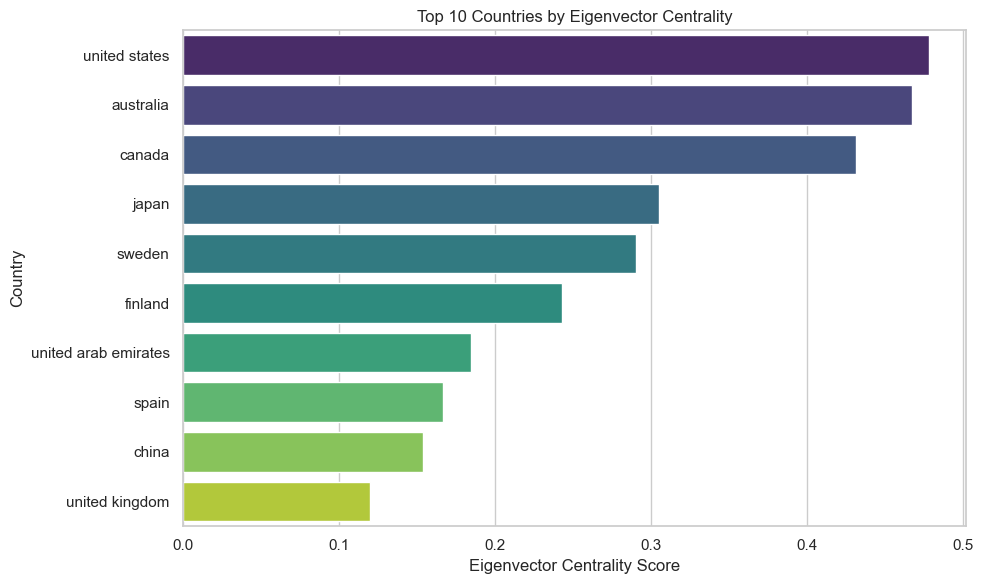

C:\Users\yash1\AppData\Local\Temp\ipykernel_7092\752888008.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries[measure], y=top_countries.index, palette='viridis')


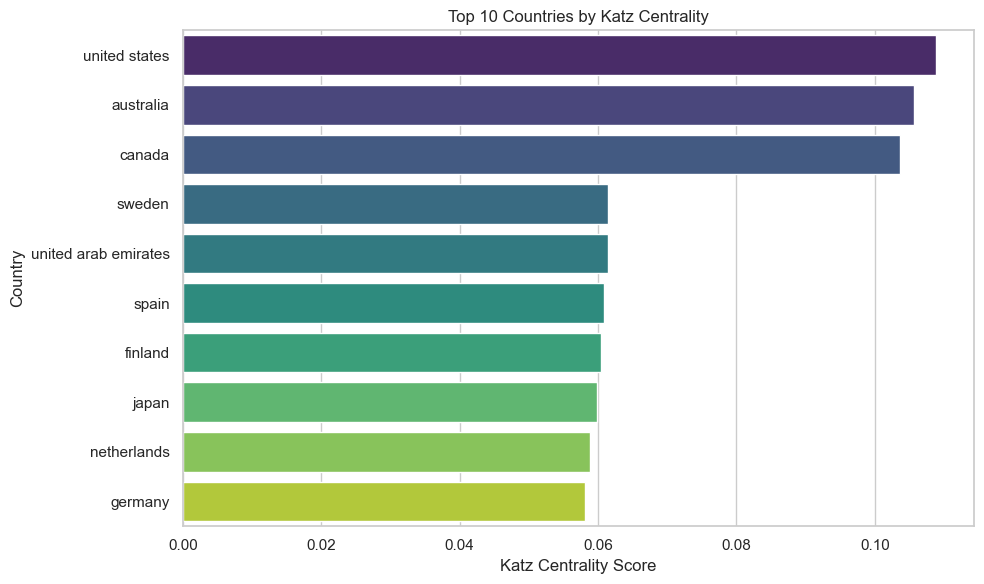

C:\Users\yash1\AppData\Local\Temp\ipykernel_7092\752888008.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries[measure], y=top_countries.index, palette='viridis')


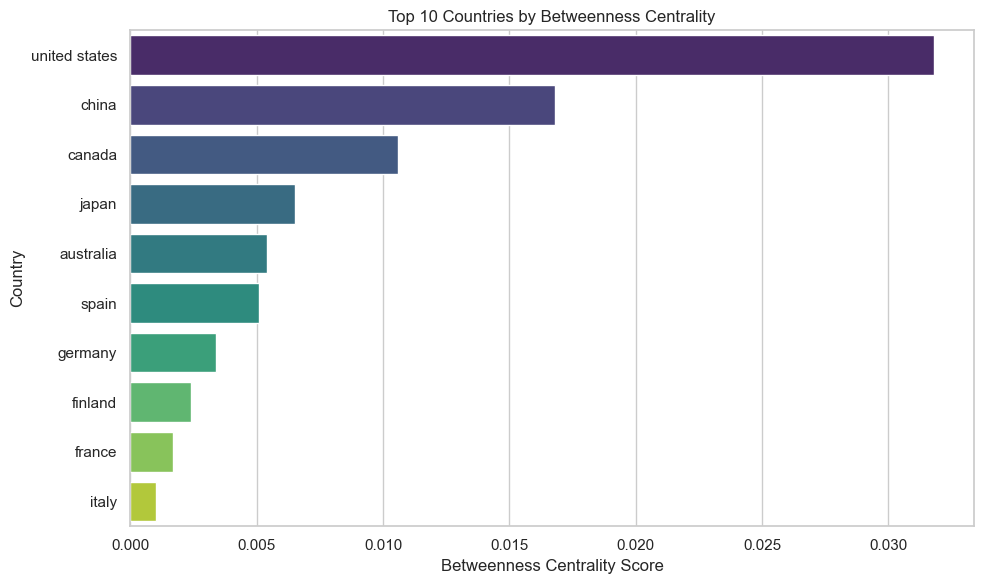

C:\Users\yash1\AppData\Local\Temp\ipykernel_7092\752888008.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries[measure], y=top_countries.index, palette='viridis')


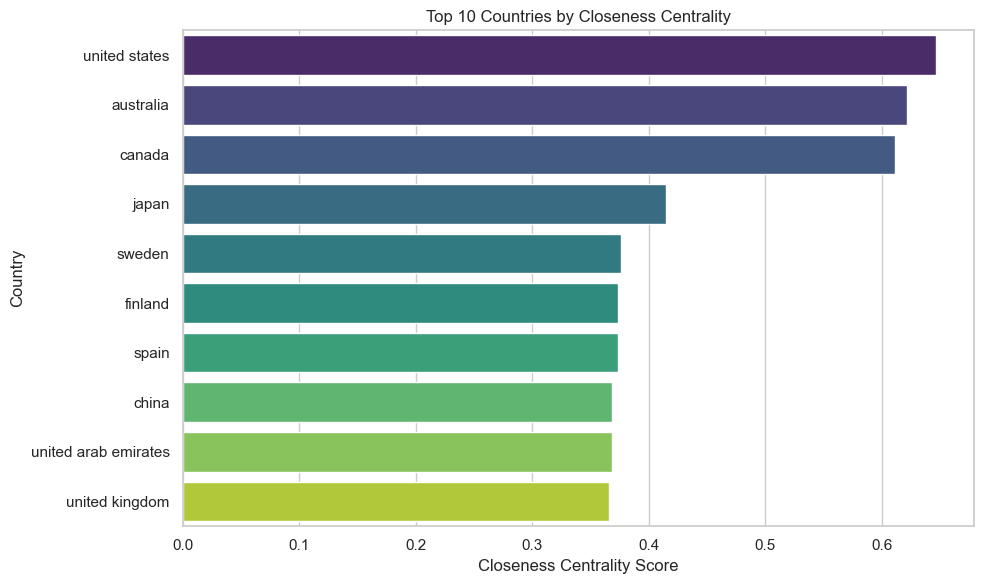

C:\Users\yash1\AppData\Local\Temp\ipykernel_7092\752888008.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries[measure], y=top_countries.index, palette='viridis')


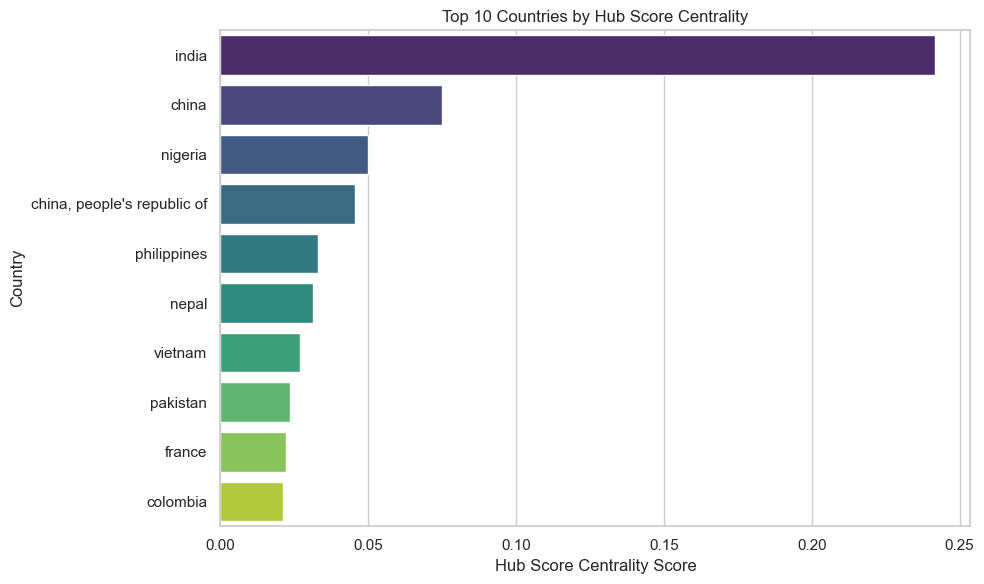

C:\Users\yash1\AppData\Local\Temp\ipykernel_7092\752888008.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries[measure], y=top_countries.index, palette='viridis')


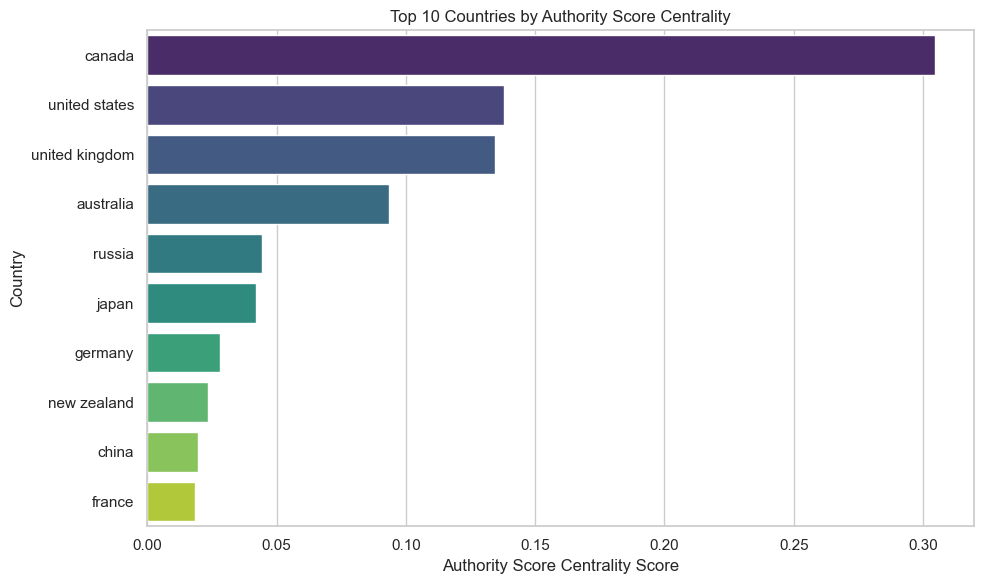

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style
sns.set(style="whitegrid")

# Plotting function
def plot_centrality(centrality_df, measure, top_n=10):
    top_countries = centrality_df.sort_values(by=measure, ascending=False).head(top_n)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_countries[measure], y=top_countries.index, palette='viridis')
    plt.title(f"Top {top_n} Countries by {measure} Centrality")
    plt.xlabel(f"{measure} Centrality Score")
    plt.ylabel("Country")
    plt.tight_layout()
    plt.show()

# Plot all centralities
for col in centrality_df.columns:
    plot_centrality(centrality_df, col)


C:\Users\yash1\AppData\Local\Temp\ipykernel_7092\2657555823.py:60: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  source_coords = source_country.geometry.centroid.values[0]
C:\Users\yash1\AppData\Local\Temp\ipykernel_7092\2657555823.py:61: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  target_coords = target_country.geometry.centroid.values[0]
C:\Users\yash1\AppData\Local\Temp\ipykernel_7092\2657555823.py:60: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  source_coords = source_country.geometry.centroid.values[0]
C:\Users\yash1\AppData\Local\Temp\ipykernel_7092\2657555823.p

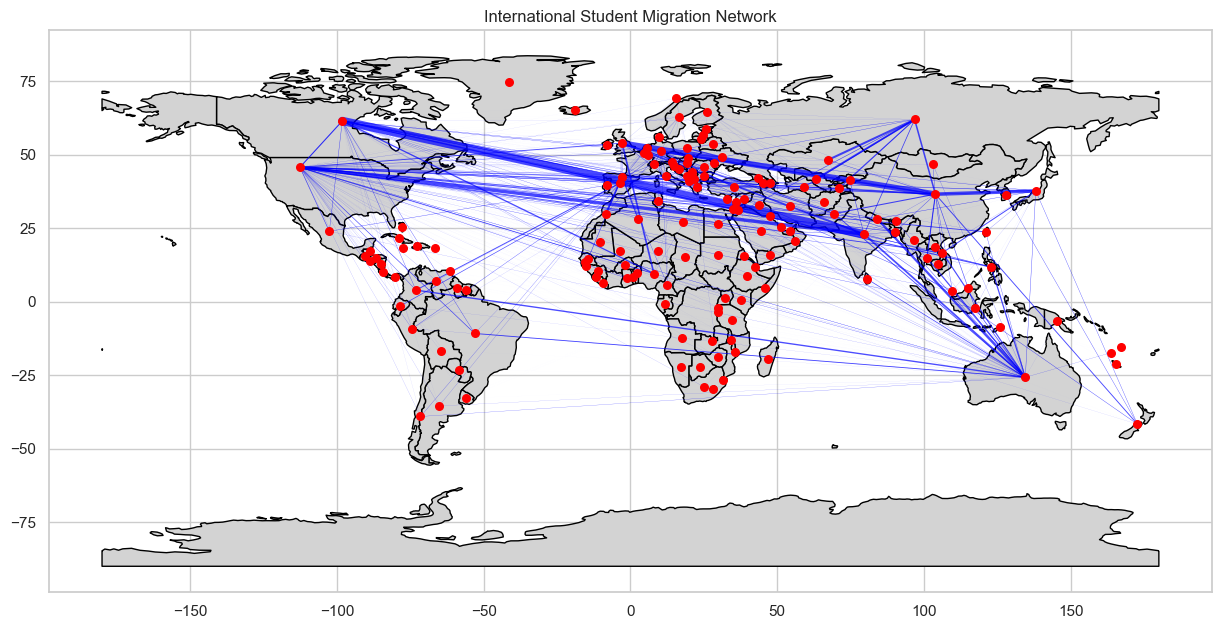

In [10]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd

# Load the CSV file
file_path = "NCS_IS.csv"
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip()

# Standardize country names (lowercase, remove spaces)
df["From"] = df["From"].str.strip().str.lower()
df["To"] = df["To"].str.strip().str.lower()

# Clean and convert 'Number of Students' column
df["Number of Students"] = df["Number of Students"].astype(str).str.replace(",", "").astype(float)

# Create a directed graph
G = nx.DiGraph()

# Add edges with weights (number of students migrating)
for _, row in df.iterrows():
    source = row["From"]
    target = row["To"]
    weight = row["Number of Students"]  # Already cleaned

    if pd.notna(weight):  # Only proceed if weight is valid
        G.add_edge(source, target, weight=weight)

# Load world map
world = gpd.read_file("https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson")

# Standardize country names in the map
world["NAME"] = world["NAME"].str.strip().str.lower()

# Create the figure and axis
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the world map
world.plot(ax=ax, color="lightgrey", edgecolor="black")

# Normalize edge weights for visualization
if G.number_of_edges() > 0:
    max_weight = max(data["weight"] for _, _, data in G.edges(data=True))
else:
    print("No valid edges found in the graph.")
    max_weight = 1  # Prevent division by zero

edge_widths = [data["weight"] / max_weight * 6 for _, _, data in G.edges(data=True)]

# Draw migration lines
for edge, width in zip(G.edges(), edge_widths):
    source, target = edge
    source_country = world[world["NAME"] == source]
    target_country = world[world["NAME"] == target]

    if not source_country.empty and not target_country.empty:
        source_coords = source_country.geometry.centroid.values[0]
        target_coords = target_country.geometry.centroid.values[0]
        plt.plot([source_coords.x, target_coords.x], [source_coords.y, target_coords.y], color="blue", alpha=0.7, linewidth=width)

# Normalize node sizes based on outgoing students
if G.number_of_nodes() > 0:
    max_out_degree = max(G.out_degree(node) for node in G.nodes())
    node_sizes = [G.out_degree(node) / max_out_degree * 200 for node in G.nodes()]
else:
    node_sizes = []

# Draw nodes (countries) with varying sizes
for node, size in zip(G.nodes(), node_sizes):
    node_country = world[world["NAME"] == node]
    if not node_country.empty:
        coords = node_country.geometry.centroid.values[0]
        plt.scatter(coords.x, coords.y, s=30, color="red", zorder=5)

plt.title("International Student Migration Network")
plt.show()

C:\Users\yash1\AppData\Local\Temp\ipykernel_9944\1246568011.py:58: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  source_coords = source_country.geometry.centroid.values[0]
C:\Users\yash1\AppData\Local\Temp\ipykernel_9944\1246568011.py:59: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  target_coords = target_country.geometry.centroid.values[0]
C:\Users\yash1\AppData\Local\Temp\ipykernel_9944\1246568011.py:58: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  source_coords = source_country.geometry.centroid.values[0]
C:\Users\yash1\AppData\Local\Temp\ipykernel_9944\1246568011.p

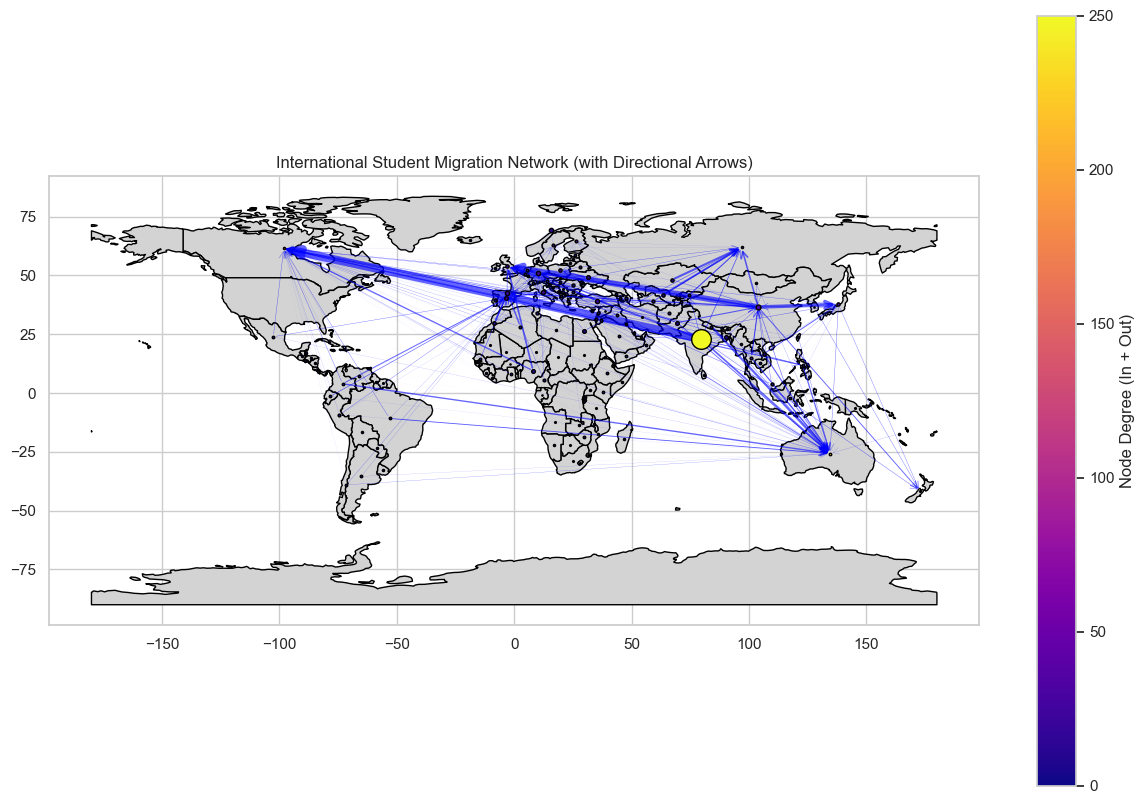

In [10]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib as mpl

# Load the CSV file
file_path = "NCS_IS.csv"
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip()

# Standardize country names (lowercase, remove spaces)
df["From"] = df["From"].str.strip().str.lower()
df["To"] = df["To"].str.strip().str.lower()

# Clean and convert 'Number of Students' column
df["Number of Students"] = df["Number of Students"].astype(str).str.replace(",", "").astype(float)

# Create a directed graph
G = nx.DiGraph()

# Add edges with weights (number of students migrating)
for _, row in df.iterrows():
    source = row["From"]
    target = row["To"]
    weight = row["Number of Students"]

    if pd.notna(weight):
        G.add_edge(source, target, weight=weight)

# Load world map
world = gpd.read_file("https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson")
world["NAME"] = world["NAME"].str.strip().str.lower()

# Create the figure and axis
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the world map
world.plot(ax=ax, color="lightgrey", edgecolor="black")

# Normalize edge weights for visualization
if G.number_of_edges() > 0:
    max_weight = max(data["weight"] for _, _, data in G.edges(data=True))
else:
    print("No valid edges found in the graph.")
    max_weight = 1

edge_widths = [data["weight"] / max_weight * 6 for _, _, data in G.edges(data=True)]

# Draw migration arrows
for (source, target), width in zip(G.edges(), edge_widths):
    source_country = world[world["NAME"] == source]
    target_country = world[world["NAME"] == target]

    if not source_country.empty and not target_country.empty:
        source_coords = source_country.geometry.centroid.values[0]
        target_coords = target_country.geometry.centroid.values[0]

        ax.annotate("",
                    xy=(target_coords.x, target_coords.y),
                    xytext=(source_coords.x, source_coords.y),
                    arrowprops=dict(arrowstyle="->",
                                    color="blue",
                                    alpha=0.6,
                                    lw=width),
                    zorder=4)

# Normalize node sizes based on outgoing students
if G.number_of_nodes() > 0:
    max_out_degree = max(G.out_degree(node) for node in G.nodes())
    node_sizes = [G.out_degree(node) / max_out_degree * 200 for node in G.nodes()]
else:
    node_sizes = []

# Draw nodes with varying sizes and color based on degree
degrees = dict(G.degree())
max_degree = max(degrees.values()) if degrees else 1
cmap = plt.cm.plasma
norm = mpl.colors.Normalize(vmin=0, vmax=max_degree)

for node, size in zip(G.nodes(), node_sizes):
    node_country = world[world["NAME"] == node]
    if not node_country.empty:
        coords = node_country.geometry.centroid.values[0]
        degree = degrees.get(node, 0)
        color = cmap(norm(degree))
        plt.scatter(coords.x, coords.y, s=size, color=color, edgecolors="black", zorder=5)

# Add colorbar legend
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', label='Node Degree (In + Out)')

plt.title("International Student Migration Network (with Directional Arrows)")
plt.show()


C:\Users\yash1\AppData\Local\Temp\ipykernel_22512\1489244973.py:60: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  source_coords = source_country.geometry.centroid.values[0]
C:\Users\yash1\AppData\Local\Temp\ipykernel_22512\1489244973.py:61: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  target_coords = target_country.geometry.centroid.values[0]
C:\Users\yash1\AppData\Local\Temp\ipykernel_22512\1489244973.py:60: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  source_coords = source_country.geometry.centroid.values[0]
C:\Users\yash1\AppData\Local\Temp\ipykernel_22512\14892449

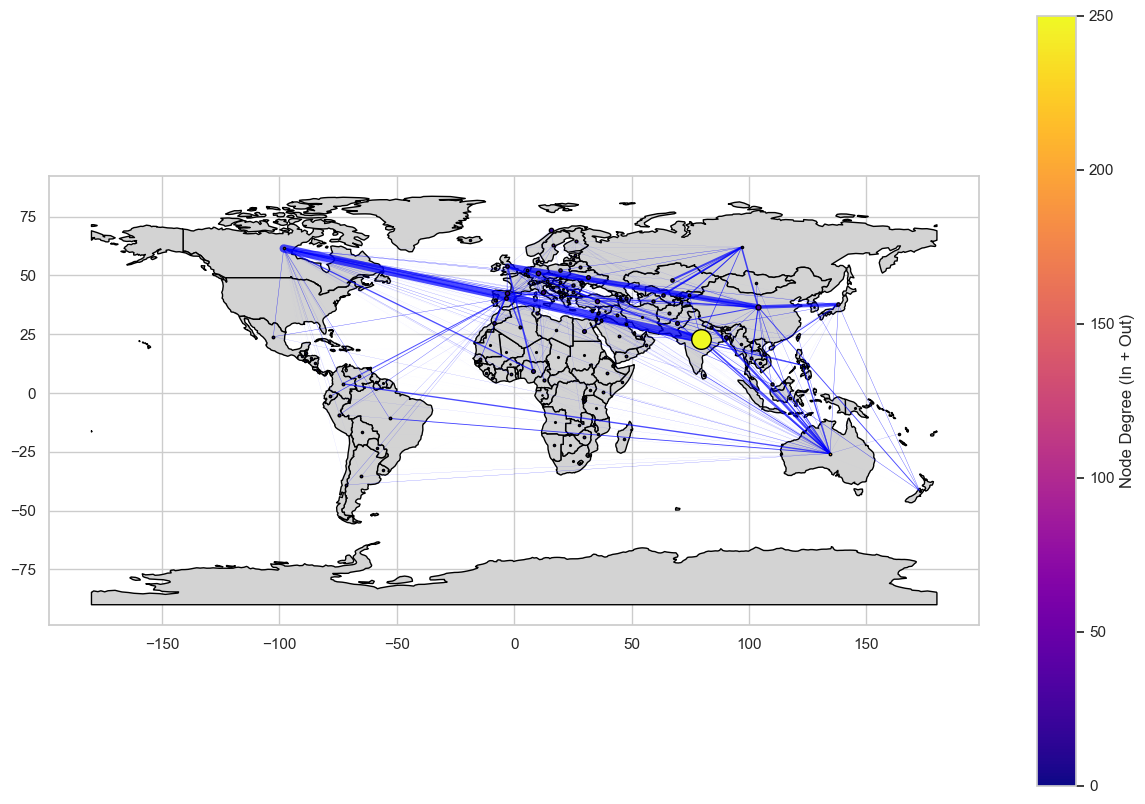

In [8]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd

# Load the CSV file
file_path = "NCS_IS.csv"
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip()

# Standardize country names (lowercase, remove spaces)
df["From"] = df["From"].str.strip().str.lower()
df["To"] = df["To"].str.strip().str.lower()

# Clean and convert 'Number of Students' column
df["Number of Students"] = df["Number of Students"].astype(str).str.replace(",", "").astype(float)

# Create a directed graph
G = nx.DiGraph()

# Add edges with weights (number of students migrating)
for _, row in df.iterrows():
    source = row["From"]
    target = row["To"]
    weight = row["Number of Students"]  # Already cleaned

    if pd.notna(weight):  # Only proceed if weight is valid
        G.add_edge(source, target, weight=weight)

# Load world map
world = gpd.read_file("https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson")

# Standardize country names in the map
world["NAME"] = world["NAME"].str.strip().str.lower()

# Create the figure and axis
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the world map
world.plot(ax=ax, color="lightgrey", edgecolor="black")

# Normalize edge weights for visualization
if G.number_of_edges() > 0:
    max_weight = max(data["weight"] for _, _, data in G.edges(data=True))
else:
    print("No valid edges found in the graph.")
    max_weight = 1  # Prevent division by zero

edge_widths = [data["weight"] / max_weight * 6 for _, _, data in G.edges(data=True)]

# Draw migration lines
for edge, width in zip(G.edges(), edge_widths):
    source, target = edge
    source_country = world[world["NAME"] == source]
    target_country = world[world["NAME"] == target]

    if not source_country.empty and not target_country.empty:
        source_coords = source_country.geometry.centroid.values[0]
        target_coords = target_country.geometry.centroid.values[0]
        plt.plot([source_coords.x, target_coords.x], [source_coords.y, target_coords.y], color="blue", alpha=0.7, linewidth=width)

import matplotlib as mpl

# Compute total degree for color coding
degrees = dict(G.degree())
max_degree = max(degrees.values()) if degrees else 1

# Use colormap
cmap = plt.cm.plasma
norm = mpl.colors.Normalize(vmin=0, vmax=max_degree)

# Draw nodes with color based on degree
for node in G.nodes():
    node_country = world[world["NAME"] == node]
    if not node_country.empty:
        coords = node_country.geometry.centroid.values[0]
        degree = degrees.get(node, 0)
        color = cmap(norm(degree))
        size = G.out_degree(node) / max_out_degree * 200 if max_out_degree else 30
        plt.scatter(coords.x, coords.y, s=size, color=color, edgecolors="black", zorder=5)

# Optional: Add a colorbar legend
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', label='Node Degree (In + Out)')




C:\Users\yash1\AppData\Local\Temp\ipykernel_7092\2699904437.py:33: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', num_communities)
C:\Users\yash1\AppData\Local\Temp\ipykernel_7092\2699904437.py:56: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  src_coords = src_geo.geometry.centroid.values[0]
C:\Users\yash1\AppData\Local\Temp\ipykernel_7092\2699904437.py:57: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tgt_coords = tgt_geo.geometry.centroid.values[0]
C:\Users\yash1\AppData\Local\Temp\ipykernel_7092\2699904

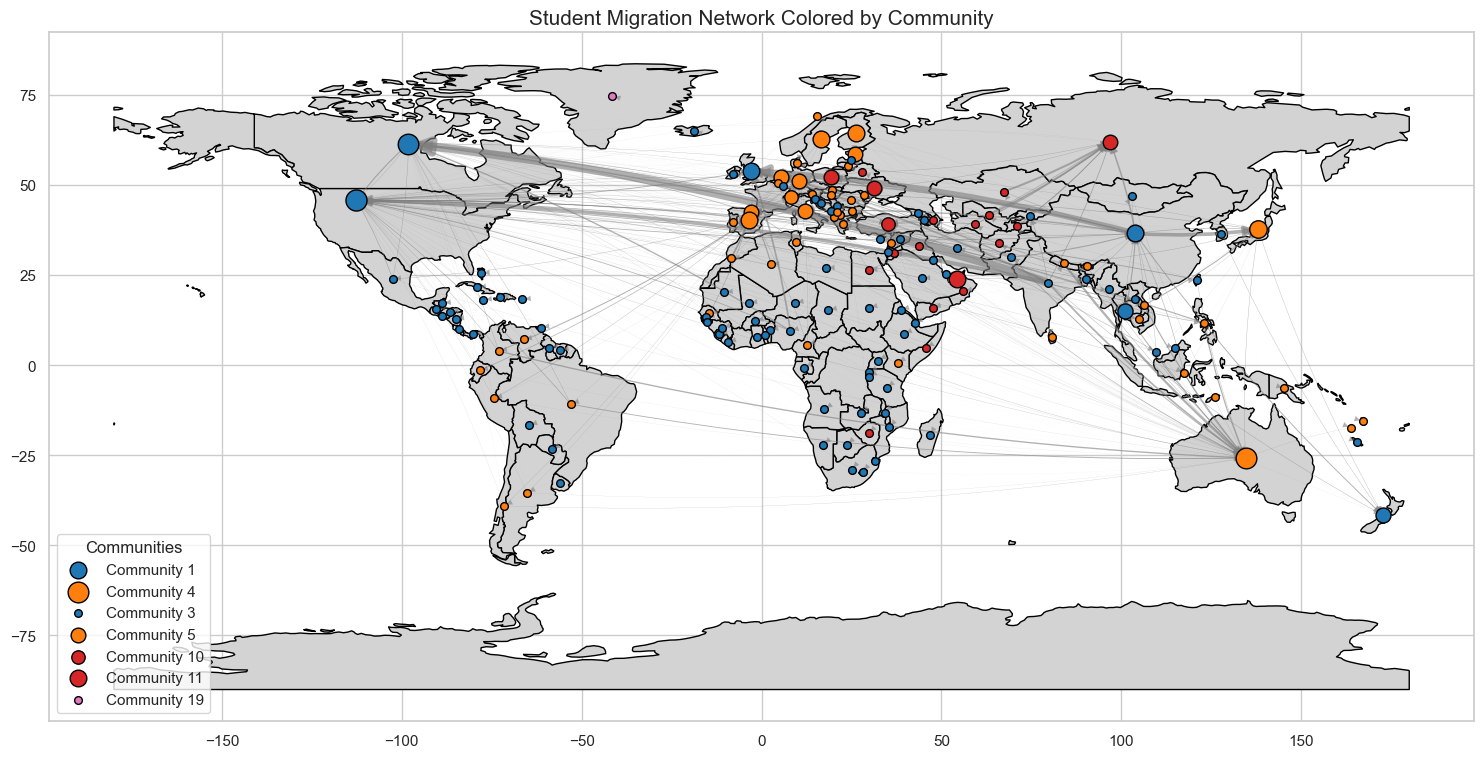


Total number of communities detected: 31

Community 1 (13 members):
china, malaysia, thailand, pakistan, united kingdom, hong kong, mongolia, nigeria, new zealand, laos, south korea, usa, korea
--------------------------------------------------
Community 4 (34 members):
australia, nepal, brazil, vietnam, colombia, japan, indonesia, philippines, sri lanka, kenya, bhutan, mauritius, cambodia, fiji, papua new guinea, lithuania, north macedonia, maldives, timor-leste, solomon islands, seychelles, nauru, vanuatu, tuvalu, san marino, guadeloupe, kosovo, st kitts and nevis, congo, republic of, cote d'ivoire, korea, democratic people's republic of (north), pitcairn islands, st lucia, st vincent and the grenadines
--------------------------------------------------
Community 3 (197 members):
india, united states of america, taiwan, singapore, canada, bangladesh, saudi arabia, mexico, czech republic, myanmar, ireland, south africa, kuwait, zambia, israel, ghana, botswana, uganda, ethiopia, tanza

In [16]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd
from community import community_louvain  # pip install python-louvain
import matplotlib.cm as cm
from matplotlib.patches import FancyArrowPatch

# Load and clean dataset
df = pd.read_csv("NCS_IS.csv")
df.columns = df.columns.str.strip()
df["From"] = df["From"].str.strip().str.lower()
df["To"] = df["To"].str.strip().str.lower()
df["Number of Students"] = df["Number of Students"].astype(str).str.replace(",", "").astype(float)

# Create directed graph
G = nx.DiGraph()
for _, row in df.iterrows():
    source = row["From"]
    target = row["To"]
    weight = row["Number of Students"]
    if pd.notna(weight):
        G.add_edge(source, target, weight=weight)

# Undirected graph for community detection
undirected_G = G.to_undirected()

# Louvain community detection
partition = community_louvain.best_partition(undirected_G, weight='weight')

# Generate colors by community
num_communities = len(set(partition.values()))
colors = cm.get_cmap('tab10', num_communities)

# Centrality calculations
eigen = nx.eigenvector_centrality_numpy(undirected_G, weight='weight')
closeness = nx.closeness_centrality(G)

# Load and prepare world map
world = gpd.read_file("https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson")
world["NAME"] = world["NAME"].str.strip().str.lower()

# Plot base map
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color="lightgrey", edgecolor="black")

# Normalize edge weights
max_weight = max([data["weight"] for _, _, data in G.edges(data=True)]) if G.number_of_edges() > 0 else 1
edge_widths = [data["weight"] / max_weight * 6 for _, _, data in G.edges(data=True)]

# Draw directed edges with arrows
for (source, target), width in zip(G.edges(), edge_widths):
    src_geo = world[world["NAME"] == source]
    tgt_geo = world[world["NAME"] == target]
    if not src_geo.empty and not tgt_geo.empty:
        src_coords = src_geo.geometry.centroid.values[0]
        tgt_coords = tgt_geo.geometry.centroid.values[0]

        arrow = FancyArrowPatch((src_coords.x, src_coords.y),
                                (tgt_coords.x, tgt_coords.y),
                                connectionstyle="arc3,rad=0.05",
                                arrowstyle='-|>',
                                color='gray',
                                mutation_scale=10 + width * 2,
                                linewidth=width,
                                alpha=0.6)
        ax.add_patch(arrow)

# Normalize centralities
max_close = max(closeness.values()) if closeness else 1

# Plot nodes with community colors
for node in G.nodes():
    country = world[world["NAME"] == node]
    if not country.empty:
        coords = country.geometry.centroid.values[0]
        community_id = partition.get(node, 0)
        size = closeness.get(node, 0) / max_close * 200
        ax.scatter(coords.x, coords.y,
                   s=size + 30,
                   color=colors(community_id),
                   edgecolors='black',
                   label=f"Community {community_id + 1}" if f"Community {community_id + 1}" not in ax.get_legend_handles_labels()[1] else "",
                   zorder=5)

# Add legend (optional, avoid duplicate labels)
handles, labels = ax.get_legend_handles_labels()
unique = dict(zip(labels, handles))
ax.legend(unique.values(), unique.keys(), title="Communities", loc="lower left")

plt.title("Student Migration Network Colored by Community", fontsize=15)
plt.tight_layout()
plt.show()


# Group nodes by community
from collections import defaultdict

communities = defaultdict(list)
for node, comm_id in partition.items():
    communities[comm_id].append(node)

# Print number of communities and their members
print(f"\nTotal number of communities detected: {len(communities)}\n")
for comm_id, members in communities.items():
    print(f"Community {comm_id + 1} ({len(members)} members):")
    print(", ".join(members))
    print("-" * 50)


C:\Users\yash1\AppData\Local\Temp\ipykernel_7092\4287380995.py:67: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  src_coords = src_geo.geometry.centroid.values[0]
C:\Users\yash1\AppData\Local\Temp\ipykernel_7092\4287380995.py:68: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tgt_coords = tgt_geo.geometry.centroid.values[0]
C:\Users\yash1\AppData\Local\Temp\ipykernel_7092\4287380995.py:67: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  src_coords = src_geo.geometry.centroid.values[0]
C:\Users\yash1\AppData\Local\Temp\ipykernel_7092\4287380995.py:68: UserWarning: Geometry is

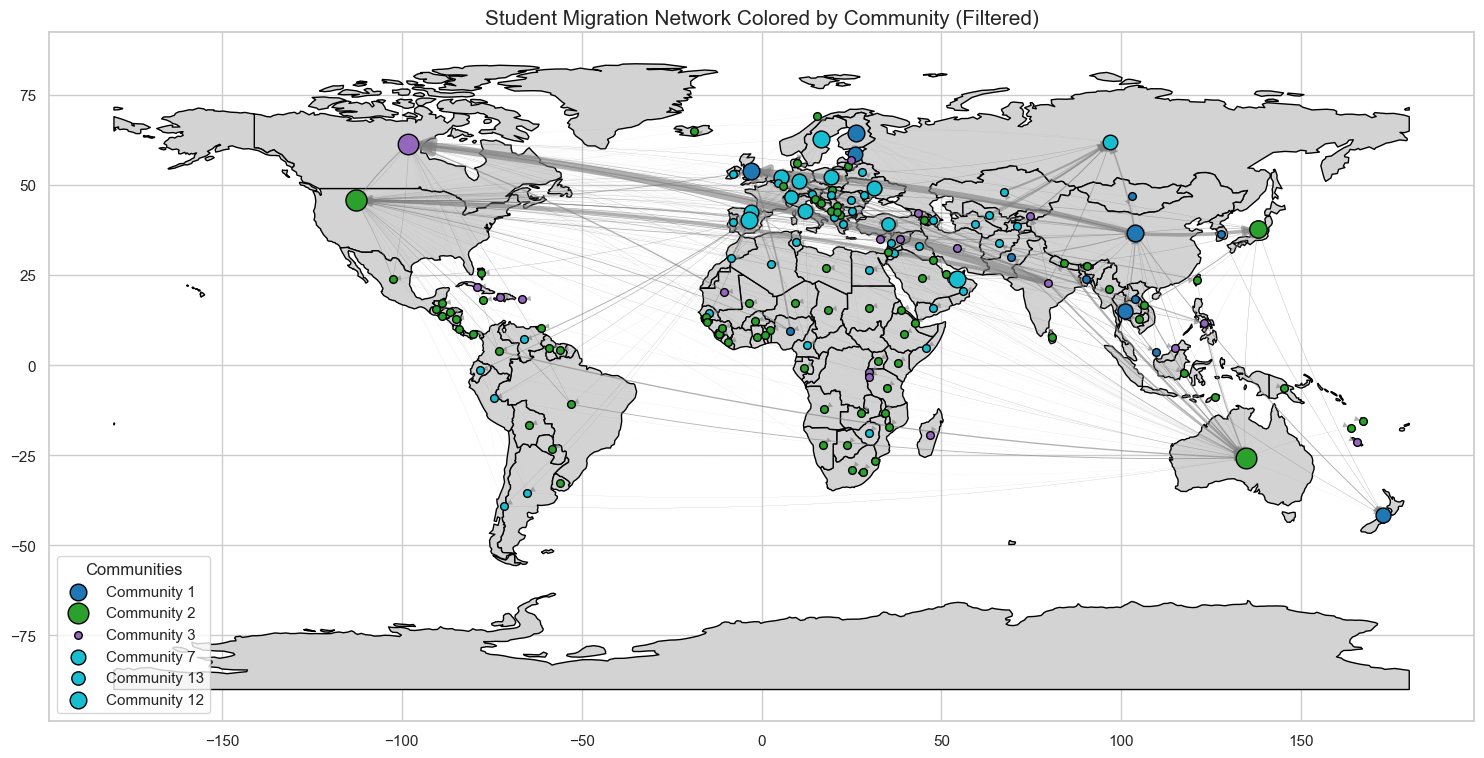


Total number of communities detected: 6

Community 1 (16 members):
china, malaysia, thailand, pakistan, united kingdom, hong kong, bangladesh, mongolia, nigeria, finland, estonia, new zealand, laos, south korea, usa, korea
--------------------------------------------------
Community 2 (127 members):
australia, nepal, brazil, united states of america, vietnam, colombia, japan, indonesia, taiwan, singapore, sri lanka, saudi arabia, norway, mexico, kenya, bhutan, mauritius, denmark, cambodia, fiji, myanmar, papua new guinea, slovakia, south africa, kuwait, lithuania, zambia, israel, ghana, botswana, north macedonia, maldives, uganda, ethiopia, tanzania, slovenia, timor-leste, solomon islands, uruguay, serbia, croatia, seychelles, paraguay, malawi, qatar, iceland, bolivia, el salvador, guatemala, tonga, luxembourg, costa rica, sudan, nauru, bosnia and herzegovina, mozambique, kiribati, panama, vanuatu, trinidad and tobago, jamaica, samoa, honduras, armenia, sierra leone, namibia, tuvalu, 

In [17]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd
from community import community_louvain  # pip install python-louvain
import matplotlib.cm as cm
from collections import Counter
from matplotlib.patches import FancyArrowPatch

# Load and clean dataset
df = pd.read_csv("NCS_IS.csv")
df.columns = df.columns.str.strip()
df["From"] = df["From"].str.strip().str.lower()
df["To"] = df["To"].str.strip().str.lower()
df["Number of Students"] = df["Number of Students"].astype(str).str.replace(",", "").astype(float)

# Create directed graph
G = nx.DiGraph()
for _, row in df.iterrows():
    source = row["From"]
    target = row["To"]
    weight = row["Number of Students"]
    if pd.notna(weight):
        G.add_edge(source, target, weight=weight)

# Convert to undirected for community detection
undirected_G = G.to_undirected()

# Louvain community detection
partition = community_louvain.best_partition(undirected_G, weight='weight')

# Count countries per community
community_counts = Counter(partition.values())
valid_communities = {comm for comm, count in community_counts.items() if count >= 3}

# Filter nodes and partition
filtered_partition = {node: comm for node, comm in partition.items() if comm in valid_communities}
G = G.subgraph(filtered_partition.keys()).copy()
undirected_G = G.to_undirected()

# Recalculate centralities
eigen = nx.eigenvector_centrality_numpy(undirected_G, weight='weight')
closeness = nx.closeness_centrality(G)

# Update partition and color map
partition = filtered_partition
num_communities = len(set(partition.values()))
colors = plt.colormaps.get_cmap('tab10').resampled(num_communities)

# Load and prepare world map
world = gpd.read_file("https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson")
world["NAME"] = world["NAME"].str.strip().str.lower()

# Plot base map
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color="lightgrey", edgecolor="black")

# Normalize edge weights
max_weight = max([data["weight"] for _, _, data in G.edges(data=True)]) if G.number_of_edges() > 0 else 1
edge_widths = [data["weight"] / max_weight * 6 for _, _, data in G.edges(data=True)]

# Draw directed edges with arrows
for (source, target), width in zip(G.edges(), edge_widths):
    src_geo = world[world["NAME"] == source]
    tgt_geo = world[world["NAME"] == target]
    if not src_geo.empty and not tgt_geo.empty:
        src_coords = src_geo.geometry.centroid.values[0]
        tgt_coords = tgt_geo.geometry.centroid.values[0]

        arrow = FancyArrowPatch((src_coords.x, src_coords.y),
                                (tgt_coords.x, tgt_coords.y),
                                connectionstyle="arc3,rad=0.05",
                                arrowstyle='-|>',
                                color='gray',
                                mutation_scale=10 + width * 2,
                                linewidth=width,
                                alpha=0.6)
        ax.add_patch(arrow)


# Normalize closeness for node size
max_close = max(closeness.values()) if closeness else 1

# Plot nodes with community colors
for node in G.nodes():
    country = world[world["NAME"] == node]
    if not country.empty:
        coords = country.geometry.centroid.values[0]
        community_id = partition.get(node, 0)
        size = closeness.get(node, 0) / max_close * 200
        ax.scatter(coords.x, coords.y,
                   s=size + 30,
                   color=colors(community_id),
                   edgecolors='black',
                   label=f"Community {community_id + 1}" if f"Community {community_id + 1}" not in ax.get_legend_handles_labels()[1] else "",
                   zorder=5)

# Add legend (avoid duplicate labels)
handles, labels = ax.get_legend_handles_labels()
unique = dict(zip(labels, handles))
ax.legend(unique.values(), unique.keys(), title="Communities", loc="lower left")

plt.title("Student Migration Network Colored by Community (Filtered)", fontsize=15)
plt.tight_layout()
plt.show()

# Group nodes by community
from collections import defaultdict

communities = defaultdict(list)
for node, comm_id in partition.items():
    communities[comm_id].append(node)

# Print number of communities and their members
print(f"\nTotal number of communities detected: {len(communities)}\n")
for comm_id, members in communities.items():
    print(f"Community {comm_id + 1} ({len(members)} members):")
    print(", ".join(members))
    print("-" * 50)


In [18]:
# Louvain community detection
partition = community_louvain.best_partition(undirected_G, weight='weight')

# Count the number of nodes in each community
from collections import Counter
community_counts = Counter(partition.values())

# Identify communities with 3 or more countries
valid_communities = {comm for comm, count in community_counts.items() if count >= 3}

# Filter nodes in valid communities only
filtered_partition = {node: comm for node, comm in partition.items() if comm in valid_communities}

# Create subgraph with only valid community nodes
G = G.subgraph(filtered_partition.keys()).copy()
undirected_G = G.to_undirected()

# Recalculate centralities and colors
eigen = nx.eigenvector_centrality_numpy(undirected_G, weight='weight')
closeness = nx.closeness_centrality(G)

# Update partition and color map
partition = filtered_partition
num_communities = len(set(partition.values()))
colors = plt.colormaps.get_cmap('tab10').resampled(num_communities)


In [19]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess the data
df = pd.read_csv("NCS_IS.csv")
df.columns = df.columns.str.strip()
df["From"] = df["From"].str.strip().str.lower()
df["To"] = df["To"].str.strip().str.lower()
df["Number of Students"] = df["Number of Students"].astype(str).str.replace(",", "").astype(float)

# Create directed graph
G = nx.DiGraph()
for _, row in df.iterrows():
    source, target = row["From"], row["To"]
    weight = row["Number of Students"]
    if pd.notna(weight):
        G.add_edge(source, target, weight=weight)

# Convert to undirected for degree correlation analysis
G_undirected = G.to_undirected()

# Assortativity (Pearson correlation coefficient)
assortativity = nx.degree_assortativity_coefficient(G_undirected)
print("Degree Assortativity Coefficient:", round(assortativity, 4))


Degree Assortativity Coefficient: -0.6748


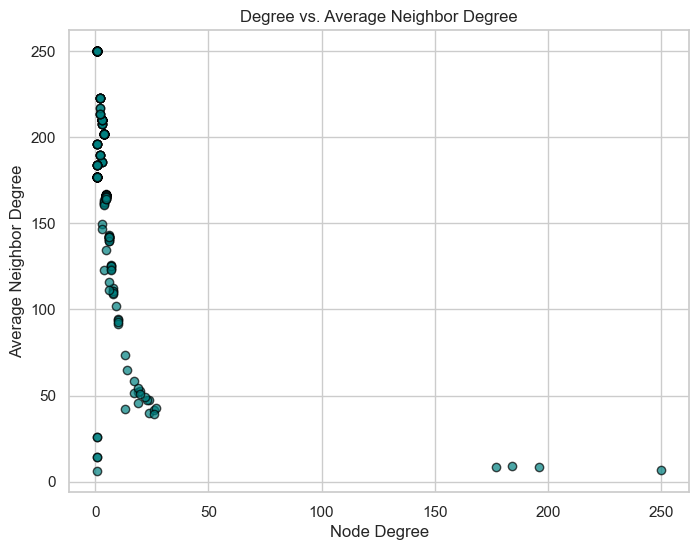

In [20]:
import numpy as np

# Get degree and average neighbor degree
degree_dict = dict(G_undirected.degree())
avg_neighbor_degree = nx.average_neighbor_degree(G_undirected)

# Prepare data
degrees = []
avg_neighbor_degrees = []

for node in G_undirected.nodes():
    degrees.append(degree_dict[node])
    avg_neighbor_degrees.append(avg_neighbor_degree[node])

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(degrees, avg_neighbor_degrees, alpha=0.7, color='teal', edgecolors='black')
plt.title("Degree vs. Average Neighbor Degree")
plt.xlabel("Node Degree")
plt.ylabel("Average Neighbor Degree")
plt.grid(True)
plt.show()


In [21]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load and clean dataset
df = pd.read_csv("NCS_IS.csv")
df.columns = df.columns.str.strip()
df["From"] = df["From"].str.strip().str.lower()
df["To"] = df["To"].str.strip().str.lower()
df["Number of Students"] = df["Number of Students"].astype(str).str.replace(",", "").astype(float)

# Create directed graph
G = nx.DiGraph()
for _, row in df.iterrows():
    source = row["From"]
    target = row["To"]
    weight = row["Number of Students"]
    if pd.notna(weight):
        G.add_edge(source, target, weight=weight)

# Convert to undirected graph for clustering analysis
G_undirected = G.to_undirected()

# 1. Global clustering coefficient (transitivity)
global_clustering = nx.transitivity(G_undirected)
print(f"Global Clustering Coefficient: {global_clustering:.4f}")


Global Clustering Coefficient: 0.0629


Random Graph Clustering Coefficient: 0.0186

Top 10 Nodes by Degree and their Clustering Coefficients:
india: Degree = 250, Local Clustering = 0.022
united states of america: Degree = 196, Local Clustering = 0.035
australia: Degree = 184, Local Clustering = 0.038
canada: Degree = 177, Local Clustering = 0.033
sweden: Degree = 27, Local Clustering = 0.462
spain: Degree = 26, Local Clustering = 0.406
united arab emirates: Degree = 26, Local Clustering = 0.305
china: Degree = 24, Local Clustering = 0.438
germany: Degree = 24, Local Clustering = 0.514
italy: Degree = 23, Local Clustering = 0.514


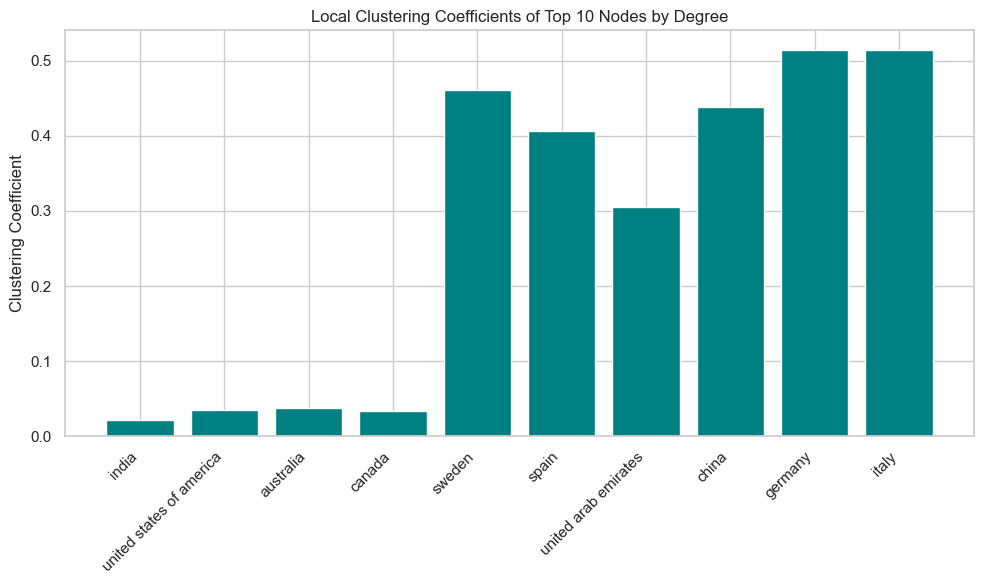

In [22]:
# 2. Generate random graph with same number of nodes and edges
n = G_undirected.number_of_nodes()
m = G_undirected.number_of_edges()
random_graph = nx.gnm_random_graph(n, m)
random_clustering = nx.transitivity(random_graph)
print(f"Random Graph Clustering Coefficient: {random_clustering:.4f}")

# 3. Local clustering coefficients (subset of top-degree nodes)
local_clustering = nx.clustering(G_undirected)
top_nodes = sorted(G_undirected.degree, key=lambda x: x[1], reverse=True)[:10]

print("\nTop 10 Nodes by Degree and their Clustering Coefficients:")
for node, degree in top_nodes:
    coeff = local_clustering.get(node, 0)
    print(f"{node}: Degree = {degree}, Local Clustering = {coeff:.3f}")

# Optional: Plot local clustering coefficients
plt.figure(figsize=(10, 6))
top_names = [node for node, _ in top_nodes]
top_coeffs = [local_clustering[node] for node in top_names]
plt.bar(top_names, top_coeffs, color='teal')
plt.xticks(rotation=45, ha='right')
plt.title("Local Clustering Coefficients of Top 10 Nodes by Degree")
plt.ylabel("Clustering Coefficient")
plt.tight_layout()
plt.show()


In [16]:
pip install numpy scipy scikit-learn matplotlib pandas geopandas --no-cache-dir


Note: you may need to restart the kernel to use updated packages.


In [17]:
import pandas as pd
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from matplotlib.cm import get_cmap

# Load migration data
df = pd.read_csv("NCS_IS.csv")
df.columns = df.columns.str.strip()
df["From"] = df["From"].str.strip().str.lower()
df["To"] = df["To"].str.strip().str.lower()
df["Number of Students"] = df["Number of Students"].astype(str).str.replace(",", "").astype(float)

# Build undirected graph
G = nx.Graph()
for _, row in df.iterrows():
    G.add_edge(row["From"], row["To"], weight=row["Number of Students"])

# Get adjacency matrix
A = nx.to_numpy_array(G, weight='weight')
nodes = list(G.nodes())

# Apply Spectral Clustering
n_clusters = 4
clustering = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', random_state=0)
labels = clustering.fit_predict(A)
label_map = {node: label for node, label in zip(nodes, labels)}

# Load world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world["name"] = world["name"].str.lower()

# Plot
fig, ax = plt.subplots(figsize=(16, 10))
world.plot(ax=ax, color='lightgrey', edgecolor='black')

# Color map
cmap = get_cmap("tab10", n_clusters)

# Plot countries
for node in G.nodes():
    country = world[world["name"] == node]
    if not country.empty:
        coords = country.geometry.centroid.iloc[0]
        cluster_id = label_map[node]
        ax.scatter(coords.x, coords.y, color=cmap(cluster_id), edgecolor='black', s=80)

# Plot edges
for u, v, data in G.edges(data=True):
    src = world[world["name"] == u]
    tgt = world[world["name"] == v]
    if not src.empty and not tgt.empty:
        src_coords = src.geometry.centroid.iloc[0]
        tgt_coords = tgt.geometry.centroid.iloc[0]
        ax.plot([src_coords.x, tgt_coords.x], [src_coords.y, tgt_coords.y], color='gray', alpha=0.2, linewidth=data['weight']/1000)

plt.title("Spectral Clustering of Country Network Based on Student Migration")
plt.tight_layout()
plt.show()


C:\Users\yash1\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

C:\Users\yash1\AppData\Local\Temp\ipykernel_7092\3222211651.py:57: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  source_coords = source_country.geometry.centroid.values[0]
C:\Users\yash1\AppData\Local\Temp\ipykernel_7092\3222211651.py:58: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  target_coords = target_country.geometry.centroid.values[0]
C:\Users\yash1\AppData\Local\Temp\ipykernel_7092\3222211651.py:57: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  source_coords = source_country.geometry.centroid.values[0]
C:\Users\yash1\AppData\Local\Temp\ipykernel_7092\3222211651.p

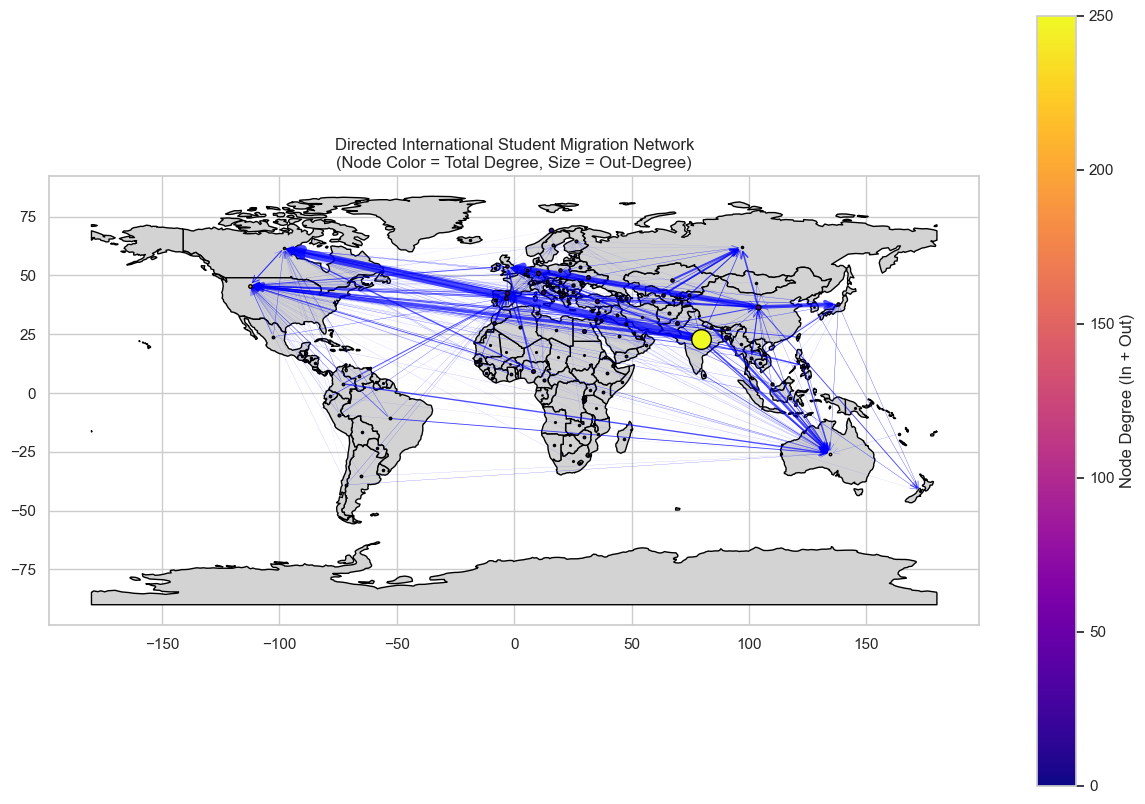

In [13]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib as mpl

# Load the CSV file
file_path = "NCS_IS.csv"
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip()

# Standardize country names (lowercase, remove spaces)
df["From"] = df["From"].str.strip().str.lower()
df["To"] = df["To"].str.strip().str.lower()

# Clean and convert 'Number of Students' column
df["Number of Students"] = df["Number of Students"].astype(str).str.replace(",", "").astype(float)

# Create a directed graph
G = nx.DiGraph()

# Add edges with weights
for _, row in df.iterrows():
    source = row["From"]
    target = row["To"]
    weight = row["Number of Students"]

    if pd.notna(weight):
        G.add_edge(source, target, weight=weight)

# Load world map
world = gpd.read_file("https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson")
world["NAME"] = world["NAME"].str.strip().str.lower()

# Create the figure and axis
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color="lightgrey", edgecolor="black")

# Normalize edge weights
if G.number_of_edges() > 0:
    max_weight = max(data["weight"] for _, _, data in G.edges(data=True))
else:
    print("No valid edges found in the graph.")
    max_weight = 1

edge_widths = [data["weight"] / max_weight * 6 for _, _, data in G.edges(data=True)]

# Draw arrows for migration
for edge, width in zip(G.edges(), edge_widths):
    source, target = edge
    source_country = world[world["NAME"] == source]
    target_country = world[world["NAME"] == target]

    if not source_country.empty and not target_country.empty:
        source_coords = source_country.geometry.centroid.values[0]
        target_coords = target_country.geometry.centroid.values[0]
        ax.annotate('', xy=(target_coords.x, target_coords.y), xytext=(source_coords.x, source_coords.y),
                    arrowprops=dict(facecolor='blue', edgecolor='blue', arrowstyle='->', lw=width, alpha=0.7))

# Compute degrees for color and size
degrees = dict(G.degree())
out_degrees = dict(G.out_degree())
max_degree = max(degrees.values()) if degrees else 1
max_out_degree = max(out_degrees.values()) if out_degrees else 1

# Colormap
cmap = plt.cm.plasma
norm = mpl.colors.Normalize(vmin=0, vmax=max_degree)

# Draw nodes with color (degree) and size (out-degree)
for node in G.nodes():
    node_country = world[world["NAME"] == node]
    if not node_country.empty:
        coords = node_country.geometry.centroid.values[0]
        degree = degrees.get(node, 0)
        out_deg = out_degrees.get(node, 0)
        color = cmap(norm(degree))
        size = out_deg / max_out_degree * 200 if max_out_degree else 30
        plt.scatter(coords.x, coords.y, s=size, color=color, edgecolors="black", zorder=5)

# Colorbar
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', label='Node Degree (In + Out)')

plt.title("Directed International Student Migration Network\n(Node Color = Total Degree, Size = Out-Degree)")
plt.show()


C:\Users\yash1\AppData\Local\Temp\ipykernel_7092\1592358447.py:60: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  source_coords = source_country.geometry.centroid.values[0]
C:\Users\yash1\AppData\Local\Temp\ipykernel_7092\1592358447.py:61: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  target_coords = target_country.geometry.centroid.values[0]
C:\Users\yash1\AppData\Local\Temp\ipykernel_7092\1592358447.py:60: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  source_coords = source_country.geometry.centroid.values[0]
C:\Users\yash1\AppData\Local\Temp\ipykernel_7092\1592358447.p

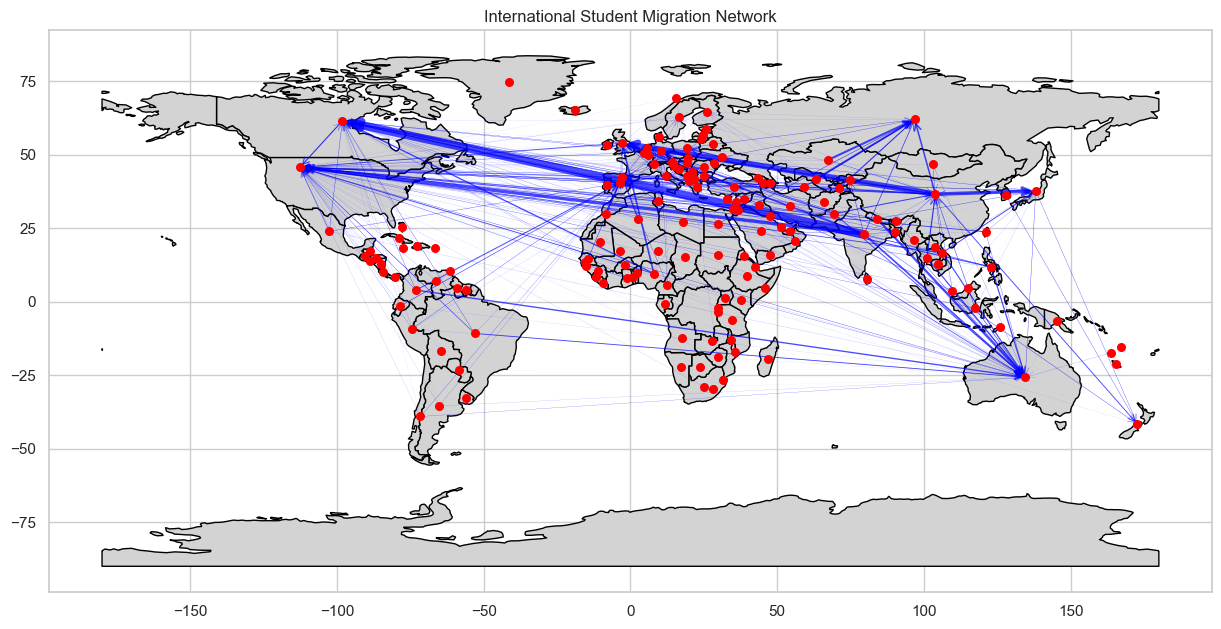

In [15]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd

# Load the CSV file
file_path = "NCS_IS.csv"
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip()

# Standardize country names (lowercase, remove spaces)
df["From"] = df["From"].str.strip().str.lower()
df["To"] = df["To"].str.strip().str.lower()

# Clean and convert 'Number of Students' column
df["Number of Students"] = df["Number of Students"].astype(str).str.replace(",", "").astype(float)

# Create a directed graph
G = nx.DiGraph()

# Add edges with weights (number of students migrating)
for _, row in df.iterrows():
    source = row["From"]
    target = row["To"]
    weight = row["Number of Students"]  # Already cleaned

    if pd.notna(weight):  # Only proceed if weight is valid
        G.add_edge(source, target, weight=weight)

# Load world map
world = gpd.read_file("https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson")

# Standardize country names in the map
world["NAME"] = world["NAME"].str.strip().str.lower()

# Create the figure and axis
fig, ax = plt.subplots(figsize=(15, 10))

# Plot the world map
world.plot(ax=ax, color="lightgrey", edgecolor="black")

# Normalize edge weights for visualization
if G.number_of_edges() > 0:
    max_weight = max(data["weight"] for _, _, data in G.edges(data=True))
else:
    print("No valid edges found in the graph.")
    max_weight = 1  # Prevent division by zero

edge_widths = [data["weight"] / max_weight * 6 for _, _, data in G.edges(data=True)]

# Draw migration lines with arrows
for edge, width in zip(G.edges(), edge_widths):
    source, target = edge
    source_country = world[world["NAME"] == source]
    target_country = world[world["NAME"] == target]

    if not source_country.empty and not target_country.empty:
        source_coords = source_country.geometry.centroid.values[0]
        target_coords = target_country.geometry.centroid.values[0]
        ax.annotate('', xy=(target_coords.x, target_coords.y), xytext=(source_coords.x, source_coords.y),
                    arrowprops=dict(facecolor='blue', edgecolor='blue', arrowstyle='->', lw=width, alpha=0.7))

# Normalize node sizes based on outgoing students
if G.number_of_nodes() > 0:
    max_out_degree = max(G.out_degree(node) for node in G.nodes())
    node_sizes = [G.out_degree(node) / max_out_degree * 200 for node in G.nodes()]
else:
    node_sizes = []

# Draw nodes (countries) with varying sizes
for node, size in zip(G.nodes(), node_sizes):
    node_country = world[world["NAME"] == node]
    if not node_country.empty:
        coords = node_country.geometry.centroid.values[0]
        plt.scatter(coords.x, coords.y, s=30, color="red", zorder=5)

plt.title("International Student Migration Network")
plt.show()


C:\Users\yash1\AppData\Local\Temp\ipykernel_7092\46504320.py:55: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  source_coords = source_country.geometry.centroid.values[0]
C:\Users\yash1\AppData\Local\Temp\ipykernel_7092\46504320.py:56: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  target_coords = target_country.geometry.centroid.values[0]
C:\Users\yash1\AppData\Local\Temp\ipykernel_7092\46504320.py:55: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  source_coords = source_country.geometry.centroid.values[0]
C:\Users\yash1\AppData\Local\Temp\ipykernel_7092\46504320.py:56: Us

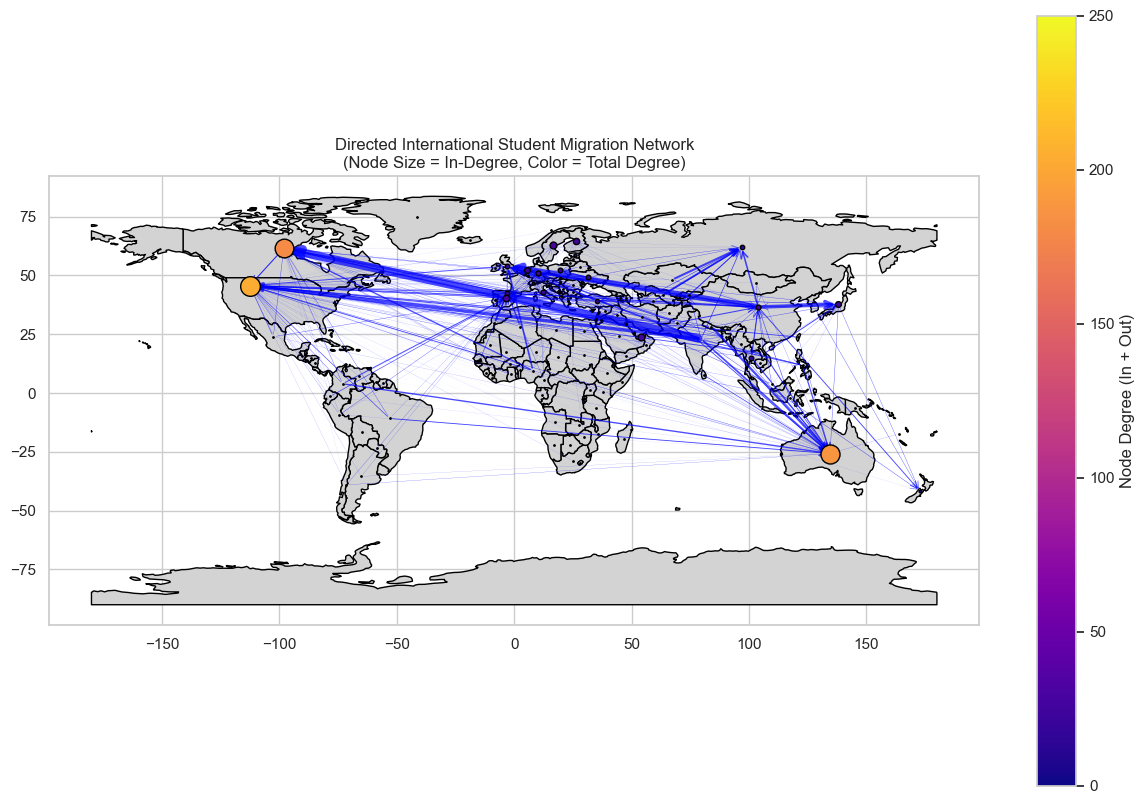

In [14]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib as mpl

# Load the CSV file
file_path = "NCS_IS.csv"
df = pd.read_csv(file_path)

# Clean column names
df.columns = df.columns.str.strip()

# Standardize country names
df["From"] = df["From"].str.strip().str.lower()
df["To"] = df["To"].str.strip().str.lower()

# Clean and convert 'Number of Students' column
df["Number of Students"] = df["Number of Students"].astype(str).str.replace(",", "").astype(float)

# Create a directed graph
G = nx.DiGraph()

# Add edges with weights
for _, row in df.iterrows():
    source = row["From"]
    target = row["To"]
    weight = row["Number of Students"]
    if pd.notna(weight):
        G.add_edge(source, target, weight=weight)

# Load and process world map
world = gpd.read_file("https://raw.githubusercontent.com/nvkelso/natural-earth-vector/master/geojson/ne_110m_admin_0_countries.geojson")
world["NAME"] = world["NAME"].str.strip().str.lower()

# Create figure
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color="lightgrey", edgecolor="black")

# Normalize edge weights
if G.number_of_edges() > 0:
    max_weight = max(data["weight"] for _, _, data in G.edges(data=True))
else:
    max_weight = 1

edge_widths = [data["weight"] / max_weight * 6 for _, _, data in G.edges(data=True)]

# Draw arrows for directed edges
for edge, width in zip(G.edges(), edge_widths):
    source, target = edge
    source_country = world[world["NAME"] == source]
    target_country = world[world["NAME"] == target]

    if not source_country.empty and not target_country.empty:
        source_coords = source_country.geometry.centroid.values[0]
        target_coords = target_country.geometry.centroid.values[0]
        ax.annotate('', xy=(target_coords.x, target_coords.y), xytext=(source_coords.x, source_coords.y),
                    arrowprops=dict(facecolor='blue', edgecolor='blue', arrowstyle='->', lw=width, alpha=0.7))

# Compute degrees
total_degrees = dict(G.degree())
in_degrees = dict(G.in_degree())
max_total_degree = max(total_degrees.values()) if total_degrees else 1
max_in_degree = max(in_degrees.values()) if in_degrees else 1

# Colormap for node color (total degree)
cmap = plt.cm.plasma
norm = mpl.colors.Normalize(vmin=0, vmax=max_total_degree)

# Draw nodes with color (total degree) and size (in-degree)
for node in G.nodes():
    node_country = world[world["NAME"] == node]
    if not node_country.empty:
        coords = node_country.geometry.centroid.values[0]
        degree = total_degrees.get(node, 0)
        in_deg = in_degrees.get(node, 0)
        color = cmap(norm(degree))
        size = in_deg / max_in_degree * 200 if max_in_degree else 30
        plt.scatter(coords.x, coords.y, s=size, color=color, edgecolors="black", zorder=5)

# Colorbar
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', label='Node Degree (In + Out)')

plt.title("Directed International Student Migration Network\n(Node Size = In-Degree, Color = Total Degree)")
plt.show()
